#### Analysis on the job ads
In this notebook I am analysing the stored job ads, with the goal of gathering interesting insights.

In [3]:
import json
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from fastai.text import TextList
import seaborn as sns

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk import stem

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raffaele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raffaele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Read JSON file
with open('data/job_ads_container_large.json') as data_file:
    job_ads_container = json.load(data_file)

In [6]:
len(job_ads_container)

167

## Text Lemmatization, Stemming and Vectorising with nlkt and sk-learn

In [7]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [8]:
description_text = [job_ads_container[item]['Description'] for item in job_ads_container]

In [37]:
description_text[0]

' DESCRIPTION Alexa Shopping Spoken Language Understanding team is looking for a senior data scientist to join a recently established team in London. The team’s mission is to ‘put the customer in the loop’ to improve the shopping experience on Alexa. The team will be  building systems to collect and use explicit and implicit signals from customer behavior. As the lead scientist on the team you will drive the investigation to make this data actionable. You will have considerable scope to direct the research to find the maximum  impact. This could include identifying leading indicators of customer dissatisfaction, using customer provided signals to improve existing Alexa language understanding models or operationalizing entirely new models to improve the experience for our customers.This is a blue-sky role that gives you a chance to roll up your sleeves and dive into big data sets in order to build simulations and experimentation systems at scale, build optimization algorithms and levera

In [9]:
description_text_words = [nltk.word_tokenize(text) for text in description_text]

In [10]:
# splitting each text in words to perform lemmatization and stemming
description_text_lem = [[wnl.lemmatize(word) for word in text] for text in description_text_words]
description_text_stem = [[porter.stem(word) for word in text] for text in description_text_words]

In [11]:
# Re-joining the lists into a text
separator = ' '
descriptions_lem = [separator.join(text) for text in description_text_lem]
descriptions_stem = [separator.join(text) for text in description_text_stem]

### _Original text_

In [55]:
description_text[0][20:130]

'Spoken Language Understanding team is looking for a senior data scientist to join a recently established team in London.'

### _Stemmed text_

In [62]:
descriptions_stem[0][20:130]

'spoken languag understand team is look for a senior data scientist to join a recent establish team in london .'

### _Lemmatized text_

In [81]:
basic_sentence=description_text[0][28:148]
lemmatized_sentence=[wnl.lemmatize(word, pos = 'v') for word in basic_sentence.split()]
separator.join(lemmatized_sentence)

'Spoken Language Understanding team be look for a senior data scientist to join a recently establish team in London.'

In [77]:
print("spoken :", wnl.lemmatize("spoken", pos = 'v')) 
print("corpora :", wnl.lemmatize("corpora")) 

# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 

spoken : speak
corpora : corpus
better : good


In [12]:
vectorizer = TfidfVectorizer(input='content', stop_words='english')
dtm = vectorizer.fit_transform(descriptions_stem).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape, len(vocab)

((167, 4188), 4188)

Let's take a look at a random word in my vocabulary

In [37]:
vocab[1200]

'double'

In [38]:
dtm

array([[0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.103926, 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.018092, 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.034021, 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ]])

In [13]:
scores = {'Words': vocab,'Scores':sum(dtm)}
word_scores = pd.DataFrame(data = scores)
word_scores.sort_values(by = ['Scores'],inplace = True, ascending = False)

In [18]:
key_skills = ['python',
             'experi','junior','senior',
             'sql',
             'nlp',
             'marketing', 'customer','market',
              'estate',
              'product','research','analytics','analyt',
             'statist','model',
             'recommend',
             'financial','fintech','financ',   
             'opencv','vision',
             'social',
             'java','c++',
             'deep','neural',
              'machin',
              'aw'
             ]

In [19]:
word_scores[word_scores.Words.isin(key_skills)]

,Words,Scores
1418,experi,8.985291
2916,product,6.043142
2226,machin,5.801777
2391,model,5.027774
3001,python,5.021593
271,analyt,4.549113
2275,market,4.085800
3176,research,3.909942
422,aw,3.651333
3398,senior,3.489841


In [24]:
key_skills_few = ['python',
             'experi','senior',
             'sql',
             'nlp','market',
              'estate',
              'product','research','analyt',
             'statist','model',
             'recommend','fintech','financ',   
             'vision',
             'social',
             'java','c++',
             'deep',
              'machin',
              'aw'
             ]

In [25]:
word_scores[word_scores.Words.isin(key_skills_few)]

,Words,Scores
1418,experi,8.985291
2916,product,6.043142
2226,machin,5.801777
2391,model,5.027774
3001,python,5.021593
271,analyt,4.549113
2275,market,4.085800
3176,research,3.909942
422,aw,3.651333
3398,senior,3.489841


In [98]:
word_scores[0:50]

,Words,Scores
1004,data,19.017357
4144,work,10.069307
1418,experi,8.985291
3848,thi,8.012704
3330,scienc,7.941769
2118,learn,7.635991
1098,develop,7.447096
1304,engin,7.296850
3768,team,7.206345
3343,scientist,6.151852


### _Based on the analysis, what are the most recurring key words in data science job ads?_  

 - **Experience**
 - **Product, Market**
 - **Modelling, Statistics**
 - **Python**
 - **SQL**
 - **NLP**
 - **AWS**
 - **Senior** rather than **Junior**
 - **Research, Insight, Analytics**
 - **Deep Learning**
 - **FinTech**

Computer vision is less present, along with social media and java.

## Comparing the advertised salary and contract type to the presence of keywords in the job description

I am going to restrict the analysis to the words contained in _key_skills_, as I don't want highly recurring words, such as "data science" and "work", to skew my analysis. This is obviously a personal choice and a very valid alternative approach would be to consider the 50 (or more) most common words, and to extend the analysis to more job ads. Unfortunately the market now (i.e. July 2020) sucks, and there aren't that many advertised positions online. The scraping notebook may be extended to include other job boards, which might provide a more well-rounded picture of the job market. another thing that could be done is to compare the scraped job descriptions, to make sure that there are no repetitions, e.g. same job advertised by multiple recruitment agencies.

In [26]:
features_indexes = word_scores[word_scores.Words.isin(key_skills_few)].index

In [27]:
features_indexes

Int64Index([1418, 2916, 2226, 2391, 3001,  271, 2275, 3176,  422, 3398, 3592,
            2508, 3631, 1044, 4069, 1518, 3515, 3084, 2011, 1511],
           dtype='int64')

In [28]:
factors_matrix = dtm[:,features_indexes]

In [29]:
factors_matrix[:,5]

array([0.05920493, 0.04050743, 0.        , 0.        , 0.        ,
       0.04168507, 0.04168507, 0.04144747, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03923839, 0.        ,
       0.04168507, 0.        , 0.        , 0.08368407, 0.15343375,
       0.        , 0.03425649, 0.02897319, 0.        , 0.        ,
       0.03829251, 0.        , 0.02075717, 0.        , 0.16338027,
       0.11253515, 0.        , 0.        , 0.        , 0.03575198,
       0.20584898, 0.03514689, 0.        , 0.12423586, 0.04857307,
       0.        , 0.        , 0.08241645, 0.        , 0.        ,
       0.07586116, 0.02906026, 0.09923852, 0.04734486, 0.04896293,
       0.        , 0.        , 0.        , 0.03676928, 0.10795007,
       0.        , 0.        , 0.0348512 , 0.        , 0.        ,
       0.        , 0.02811203, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08764435, 0.08637785, 0.15131472,
       0.        , 0.13433348, 0.        , 0.03850324, 0.02866

So we have 167 observations (i.e. jobs) with 24 features (i.e. key skills). Now I need to add the salary information.

## Testing salary value extraction

In [30]:
salary_field=job_ads_container['40396679']['Salary'].split()

from statistics import mean

def salary_extractor(test_list):
    '''
    This function takes the salary field within each job's scraped data and extracts an average value for the proposed salary, adjusted per annum
    '''
    extremes = []
    av_salary = None
    salary = None
    for item in test_list:
        if item[0]=='£':
            extremes.append(float(item[1:].replace(',', '')))
    if extremes:
        av_salary = mean(extremes)
    
        if 'day' in test_list or 'Day' in test_list:
            salary = av_salary* 260
        elif 'annum' in test_list or 'annum' in test_list:
            salary=av_salary
        else:
            salary=av_salary
    
    return salary

            
salary_extractor(salary_field)

45000.0

In [31]:
job_salary_df = pd.DataFrame(columns = ['Job_id','Salary'])
job_ids = []
job_salaries = []
for item in job_ads_container:
    job_ids.append(item)
    try:
        salary_field=job_ads_container[str(item)]['Salary'].split()
        salary = salary_extractor(salary_field)
        
    except AttributeError:
        salary = None

    job_salaries.append(salary)

job_salary_df.Job_id = job_ids
job_salary_df.Salary = job_salaries
'''
Here I build a dataframe with:
    Job_id
    Salary - as calculated in the salary_extractor function
    python...neural - key skill words with values for each observation
'''

'\nHere I build a dataframe with:\n    Job_id\n    Salary - as calculated in the salary_extractor function\n    python...neural - key skill words with values for each observation\n'

In [32]:
for i in features_indexes:
    job_salary_df[vocab[i]] = dtm[:,i]

In [33]:
job_salary_df.to_csv('data/job_salary_df_v2.csv')
job_salary_df.head()

,Job_id,Salary,experi,product,machin,model,python,analyt,market,research,...,sql,nlp,statist,deep,vision,fintech,social,recommend,java,financ
0,40396679,45000.0,0.053203,0.132850,0.000000,0.086208,0.000000,0.059205,0.0,0.034817,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,40583658,57500.0,0.000000,0.072715,0.085500,0.039322,0.000000,0.040507,0.0,0.238216,...,0.000000,0.0,0.000000,0.060448,0.0,0.000000,0.065531,0.0,0.000000,0.0
2,40610730,55000.0,0.135844,0.000000,0.047862,0.044023,0.078666,0.000000,0.0,0.000000,...,0.109597,0.0,0.161450,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,40502398,95000.0,0.026405,0.000000,0.046516,0.042786,0.038228,0.000000,0.0,0.000000,...,0.053258,0.0,0.052304,0.000000,0.0,0.244509,0.000000,0.0,0.078517,0.0
4,40509594,75000.0,0.034343,0.000000,0.121001,0.055648,0.049720,0.000000,0.0,0.067425,...,0.000000,0.0,0.068028,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0


Fraction of missing values in Salary

In [36]:
job_salary_df['Salary'].isnull().sum()/len(job_salary_df['Salary'])

0.6946107784431138

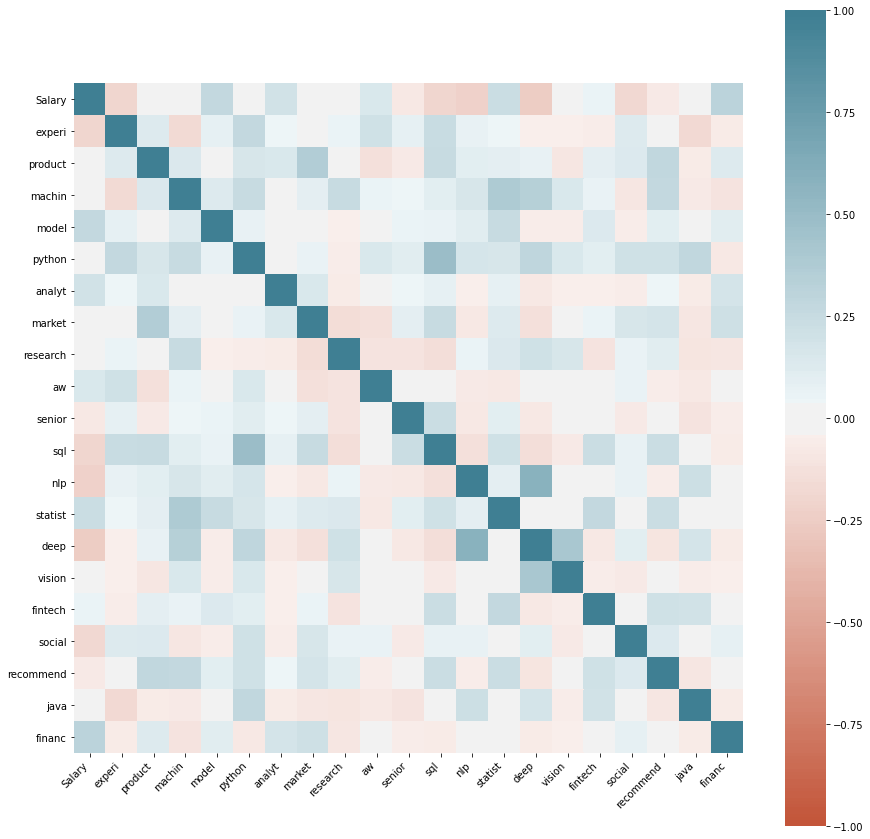

In [35]:
corr = job_salary_df.drop(['Job_id'],axis=1).corr()

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.savefig('data/corr_heatmap_v2.png')

Unfortunately 73% of the values are missing, which makes the analysis less valuable.

### _Based on this analysis, what are the clearest correlations present in the dataset?_

- xx

## WordCloud

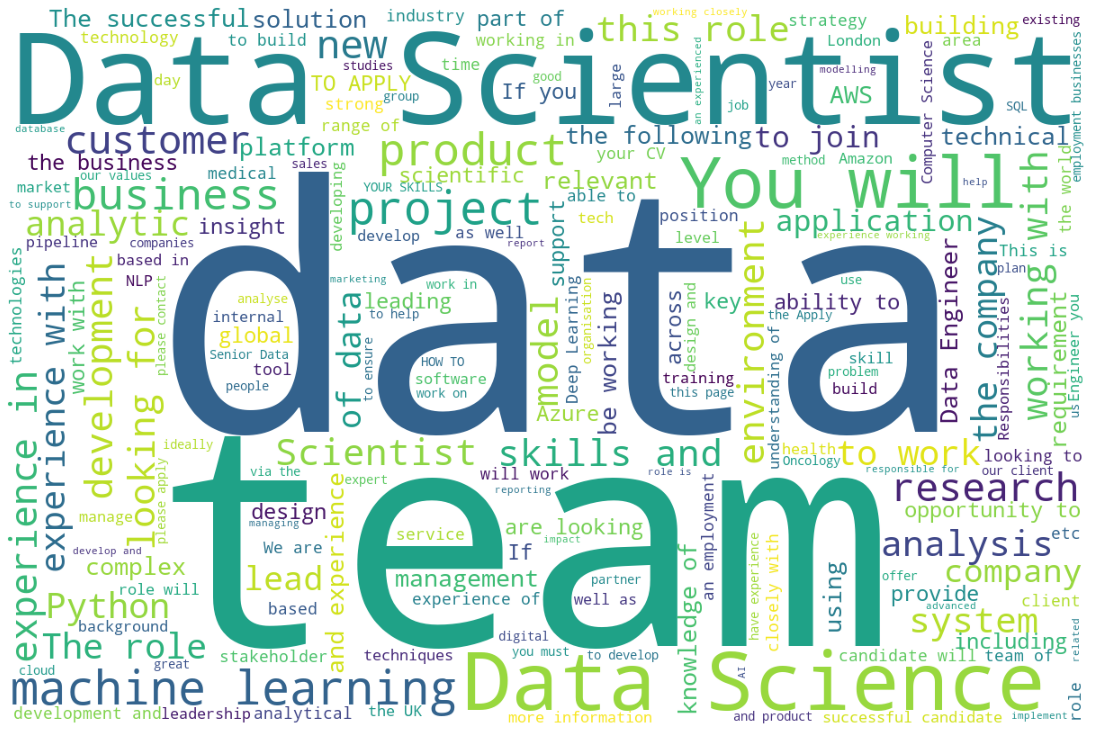

In [23]:
from wordcloud import WordCloud, STOPWORDS

text = ''
for desc in description_text:
    text+=desc

stopwords = set(STOPWORDS)

additional_stopwords = ['You will ','will be','be','will','You','within']
for sw in  additional_stopwords:
    stopwords.add(sw)
# Generate a word cloud image

# Display the generated image:
# the matplotlib way:
wordcloud=WordCloud(width = 1200, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 

# lower max_font_size
#wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize = (16, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 

plt.tight_layout(pad = 0) 
  
plt.savefig('data/white_wordcloud4.png')
plt.show()